# Color Detector

In [43]:
#import all required libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import imutils

In [44]:
#read input image
image=cv2.imread('1.png')
image=imutils.resize(image,width=530,height=350)

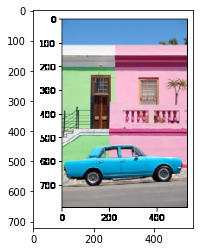

In [45]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [46]:
colors='F:\Project\Color detection\colors.csv'
index=['color','color_name','hex','R','G','B']
csv=pd.read_csv(colors, names=index, header=None)

In [47]:
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [48]:
clicked=False
r=g=b=xpos=ypos=0

In [49]:
#color recognition function
def rec_color(R,G,B):
    minimum=10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [50]:
#mouse click function
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [51]:
cv2.namedWindow('Color Recognition App')
cv2.setMouseCallback('Color Recognition App', mouse_click)
while(1):
    cv2.imshow('Color Recognition App', image)
    if(clicked):
        #cv2.rectangle(image, startpoint, endpoint, color, thickness) -1 thickness fills rectangle entirely
        cv2.rectangle(image,(20,20),(750,60),(b,g,r),-1)
        #Creating text string to display ( Color name and RGB values)
        text=rec_color(r,g,b)+'R='+str(r)+'G='+str(g)+'B='+str(b)
        #cv2.putText(img,text,start,font(0-7), fontScale, color, thickness, lineType, (optional bottomLeft bool) )
        cv2.putText(image, text,(50,50),2,0.8,(0,0,255),2,cv2.LINE_AA)
        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(image, text,(50,50),2,0.8,(255,0,0),2,cv2.LINE_AA)
        clicked=False
    #break the loop when user hits enter
    if cv2.waitKey(20) & 0xFF==13:
        break
cv2.destroyAllWindows()

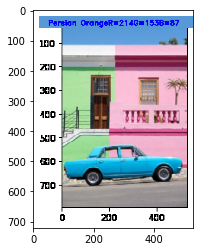

In [26]:
plt.imshow(image)

# Detect color in image and classify based on similar color

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

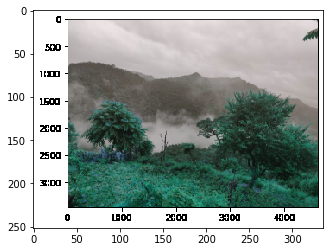

In [99]:
#read a sample
image=cv2.imread('2.png')
plt.imshow(image)

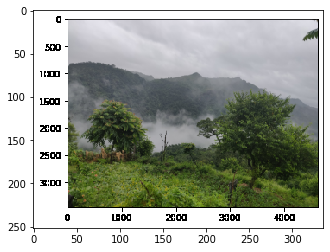

In [100]:
#convert img from BGR to RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

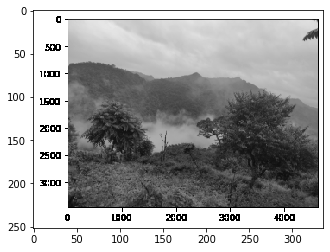

In [101]:
#convert img into Gray
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

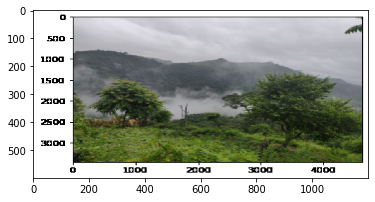

In [102]:
#resize the image
resized_image=cv2.resize(image,(1200,600))
plt.imshow(resized_image)

In [103]:
#func that can give us the hex value of color we will identify
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))

In [104]:
def get_image(path):
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [105]:
def get_colors(image,no_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clus=KMeans(n_clusters=no_of_colors)
    labels=clus.fit_predict(modified_image)
    counts=Counter(labels)
    counts=dict(sorted(counts.items()))   #sort to ensure the correct color percentage
    center_colors=clus.cluster_centers_
    
    #we get the ordered colors by iterating through the keys
    ordered_colors=[center_colors[i] for i in counts.keys()]
    hex_colors=[RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors=[ordered_colors[i] for i in counts.keys()]
    
    if(show_chart):
        plt.figure(figsize=(8,6))
        plt.pie(counts.values(),labels=hex_colors,colors=hex_colors)
    
    return rgb_colors

[array([254.83226035, 254.8318125 , 254.83539532]),
 array([67.45463477, 82.85939829, 36.96669603]),
 array([178.74821075, 179.3184679 , 185.68135227]),
 array([120.91856885, 124.96618537, 125.16307464]),
 array([14.84352746, 18.92244659, 11.46414984]),
 array([206.18148159, 205.89822833, 213.14292708]),
 array([ 99.05384527, 115.60722933,  47.57909605]),
 array([42.7920751 , 52.92052481, 29.53528879]),
 array([84.04865672, 90.83569296, 91.32712154])]

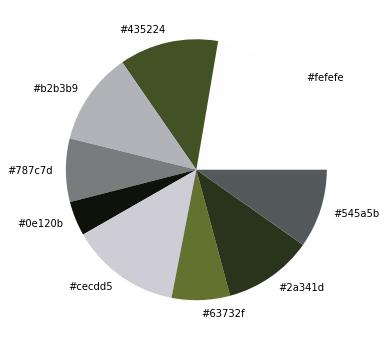

In [109]:
get_colors(get_image('2a.png'),9,True)